<Figure size 1200x500 with 0 Axes>

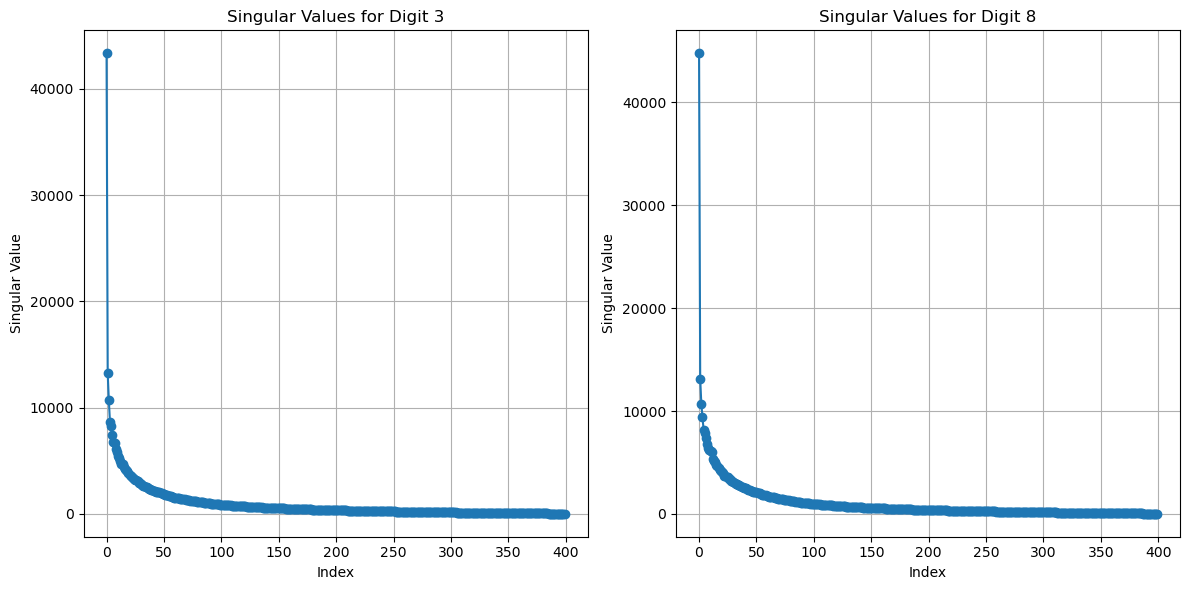

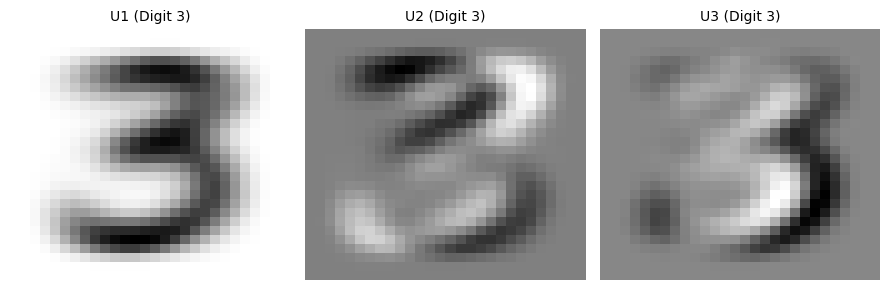

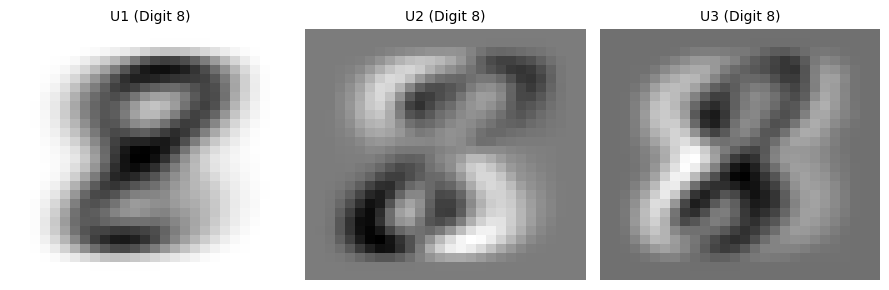

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

TrainDigits = np.load('TrainDigits.npy')
TrainLabels = np.load('TrainLabels.npy')
TrainLabels = np.reshape(TrainLabels, -1)

digits_of_interest = [3, 8]
U_matrices = {}
S_matrices = {}
Vt_matrices = {}

for i in digits_of_interest:
    index = (TrainLabels == i)
    digit_i_images = TrainDigits[:, index][:, :400]
    U_i, S_i, Vt_i = svd(digit_i_images)
    U_matrices[i] = U_i
    S_matrices[i] = S_i
    Vt_matrices[i] = Vt_i

plt.figure(figsize=(12, 5))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
for idx, i in enumerate(digits_of_interest):
    axes[idx].plot(S_matrices[i], marker='o')
    axes[idx].set_title(f'Singular Values for Digit {i}')
    axes[idx].set_xlabel('Index')
    axes[idx].set_ylabel('Singular Value')
    axes[idx].grid()

plt.tight_layout()
plt.show()

for i in digits_of_interest:
    plt.figure(figsize=(9, 3))
    U_digit = U_matrices[i]
    for idx in range(3):
        plt.subplot(1, 3, idx + 1)
        plt.imshow(U_digit[:, idx].reshape(28, 28).T, cmap='gray', aspect='auto')
        plt.title(f'U{idx + 1} (Digit {i})', fontsize=10)
        plt.axis('off')

    plt.subplots_adjust(wspace=0.3)
    plt.tight_layout()
    plt.savefig(f'singular_images_digit_{i}.png', format='png')
    plt.show()

k=5, Overall Accuracy: 91.81%
k=6, Overall Accuracy: 92.33%
k=7, Overall Accuracy: 93.02%
k=8, Overall Accuracy: 93.41%
k=9, Overall Accuracy: 93.88%
k=10, Overall Accuracy: 94.00%
k=11, Overall Accuracy: 94.14%
k=12, Overall Accuracy: 94.36%
k=13, Overall Accuracy: 94.53%
k=14, Overall Accuracy: 94.65%
k=15, Overall Accuracy: 94.69%


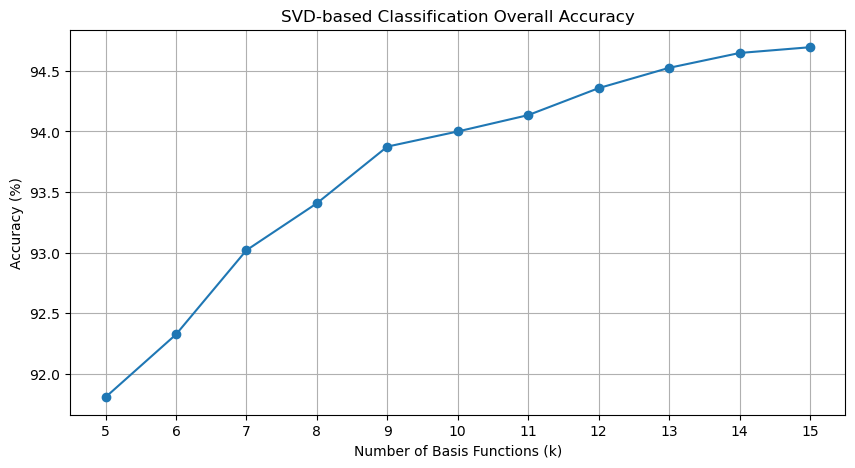

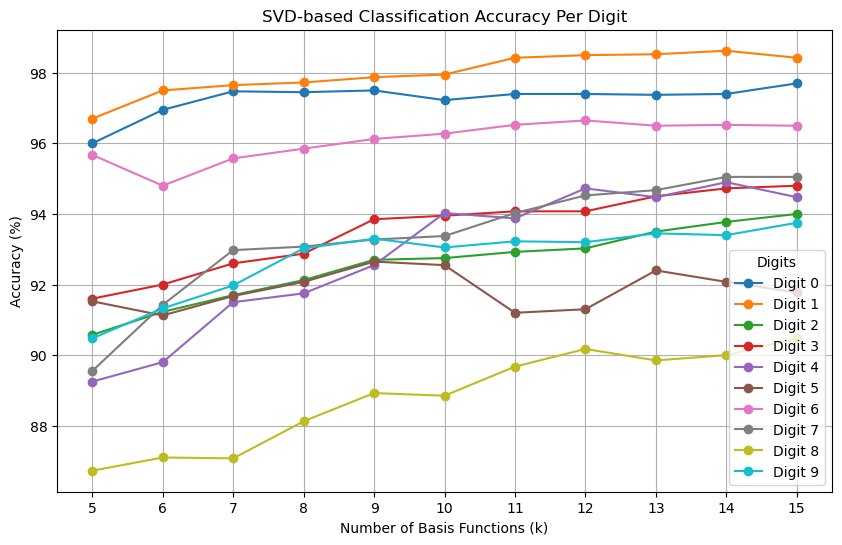

Best accuracy for digit 0: 97.70%
Best accuracy for digit 1: 98.62%
Best accuracy for digit 2: 94.00%
Best accuracy for digit 3: 94.80%
Best accuracy for digit 4: 94.90%
Best accuracy for digit 5: 92.65%
Best accuracy for digit 6: 96.65%
Best accuracy for digit 7: 95.05%
Best accuracy for digit 8: 90.48%
Best accuracy for digit 9: 93.75%


In [4]:
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt

def compute_svd_per_digit(digit_matrices):
    U_matrices, S_matrices, Vt_matrices = {}, {}, {}
    for i in digit_matrices:
        U, S, Vt = svd(digit_matrices[i], full_matrices=False)
        U_matrices[i] = U
        S_matrices[i] = S
        Vt_matrices[i] = Vt
    return U_matrices, S_matrices, Vt_matrices

def calculate_residuals(U_matrices, TestDigits, k):
    num_images = TestDigits.shape[1]
    residuals = np.zeros((10, num_images))

    for i, U in U_matrices.items():
        U_k = U[:, :k]
        projection_matrix = U_k @ U_k.T
        residual_matrix = np.eye(U_k.shape[0]) - projection_matrix
        residuals[i, :] = np.linalg.norm(residual_matrix @ TestDigits, axis=0)

    return np.argmin(residuals, axis=0)

def plot_accuracy(k_values, accuracies, accuracies_per_digit):
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, accuracies, marker='o')
    plt.title('SVD-based Classification Overall Accuracy')
    plt.xlabel('Number of Basis Functions (k)')
    plt.ylabel('Accuracy (%)')
    plt.xticks(k_values)
    plt.grid()
    plt.savefig('SVD-based_Classification_Overall_Accuracy.png', format='png')
    plt.show()

    plt.figure(figsize=(10, 6))
    for digit, acc in accuracies_per_digit.items():
        plt.plot(k_values, acc, marker='o', label=f'Digit {digit}')
    plt.title('SVD-based Classification Accuracy Per Digit')
    plt.xlabel('Number of Basis Functions (k)')
    plt.ylabel('Accuracy (%)')
    plt.xticks(k_values)
    plt.legend(title="Digits")
    plt.grid()
    plt.savefig('SVD_classification_accuracy_per_digit.png', format='png')
    plt.show()
    
TrainDigits = np.load('TrainDigits.npy')
TestDigits = np.load('TestDigits.npy')
TrainLabels = np.load('TrainLabels.npy')
TestLabels = np.load('TestLabels.npy')

TrainLabels = np.reshape(TrainLabels, -1) if TrainLabels.ndim > 1 else TrainLabels
TestLabels = np.reshape(TestLabels, -1) if TestLabels.ndim > 1 else TestLabels

digit_matrices = {i: TrainDigits[:, TrainLabels == i][:, :400] for i in range(10)}

U_matrices, S_matrices, Vt_matrices = compute_svd_per_digit(digit_matrices)

k_values = range(5, 16)
accuracies = []
accuracies_per_digit = {i: [] for i in range(10)}

for k in k_values:
    predictions = calculate_residuals(U_matrices, TestDigits, k)

    overall_accuracy = np.mean(predictions == TestLabels) * 100
    accuracies.append(overall_accuracy)

    for digit in range(10):
        digit_indices = TestLabels == digit
        digit_accuracy = np.mean(predictions[digit_indices] == TestLabels[digit_indices]) * 100
        accuracies_per_digit[digit].append(digit_accuracy)

    print(f'k={k}, Overall Accuracy: {overall_accuracy:.2f}%')

plot_accuracy(k_values, accuracies, accuracies_per_digit)

for digit in range(10):
    best_accuracy = max(accuracies_per_digit[digit])
    print(f'Best accuracy for digit {digit}: {best_accuracy:.2f}%')

<Figure size 1600x800 with 0 Axes>

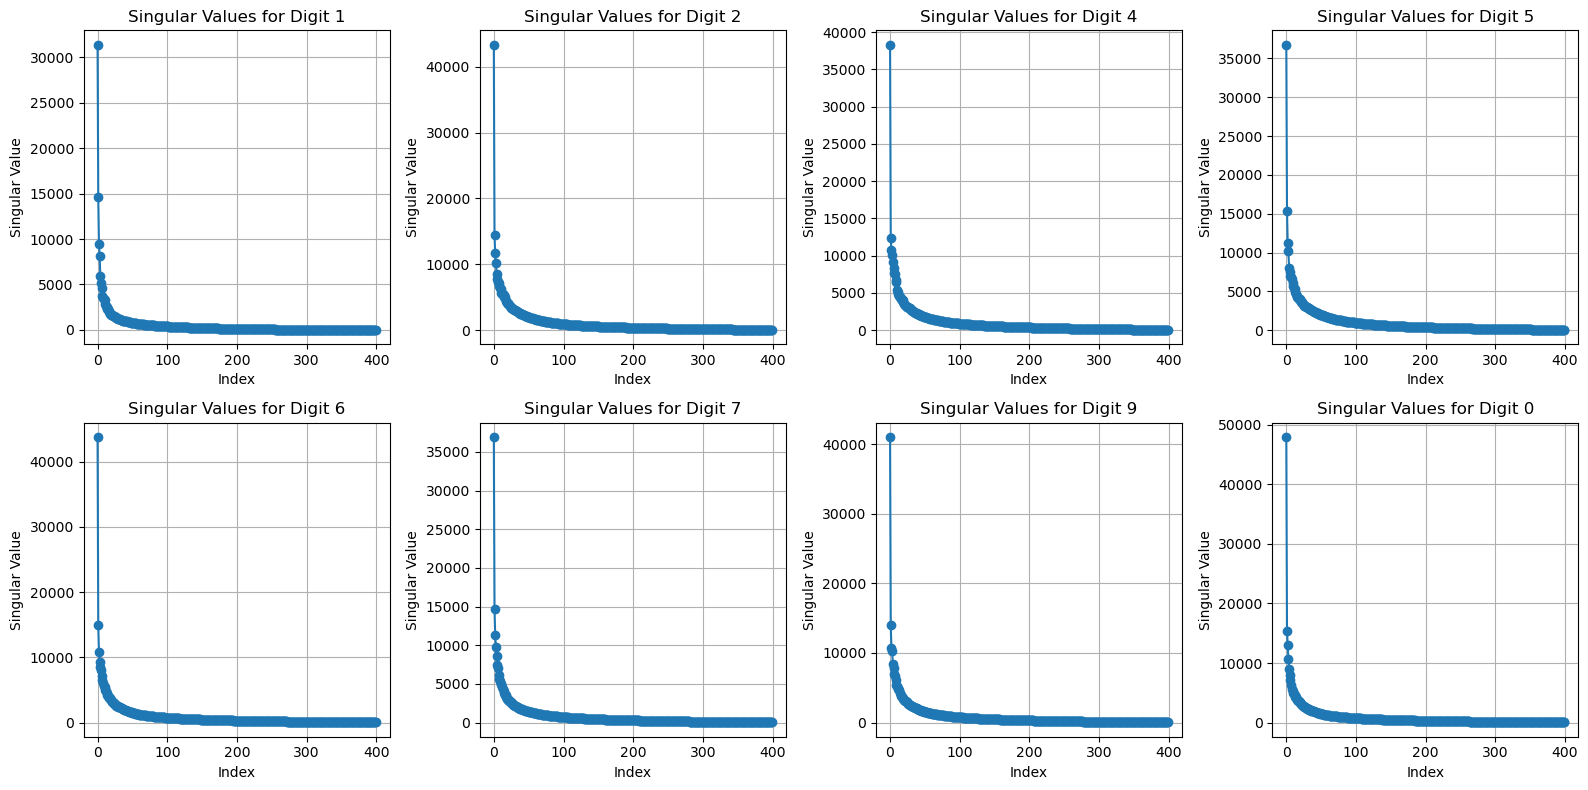

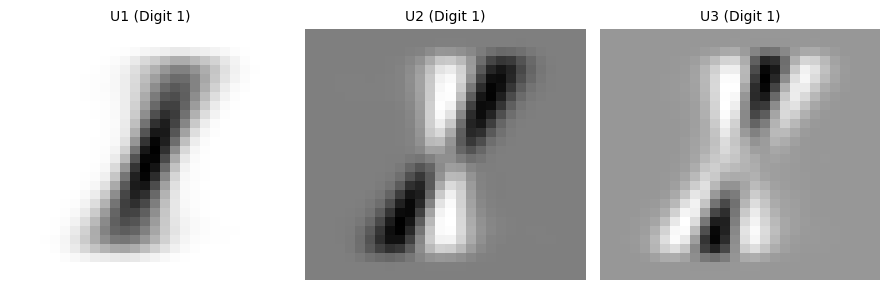

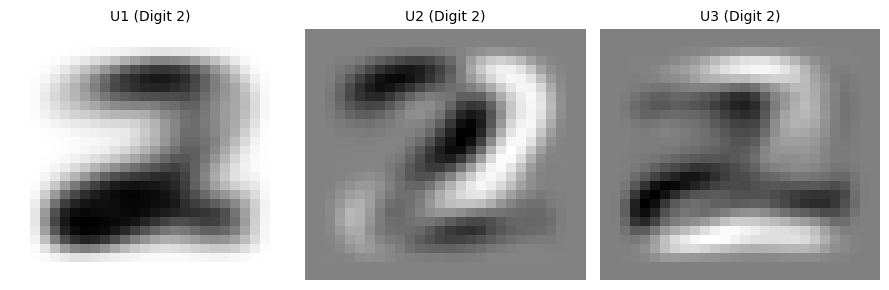

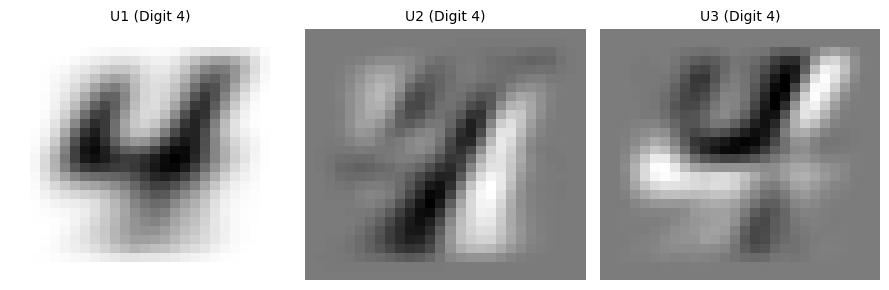

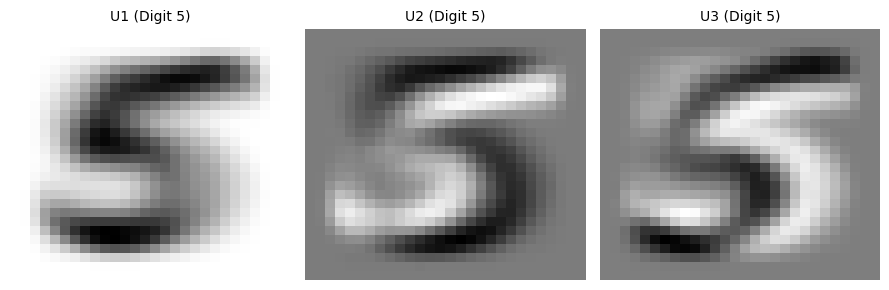

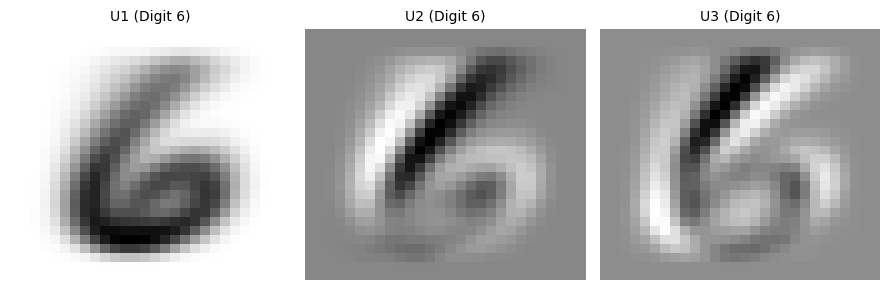

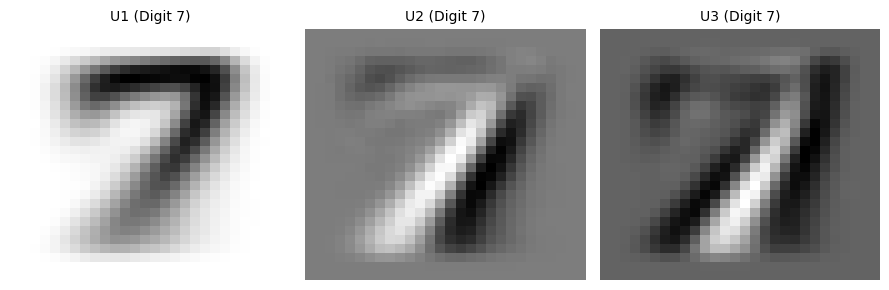

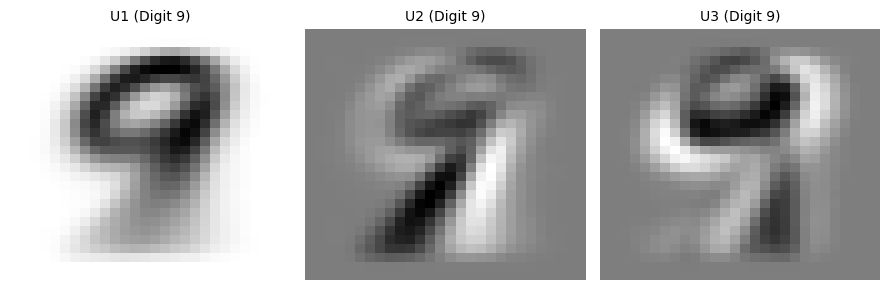

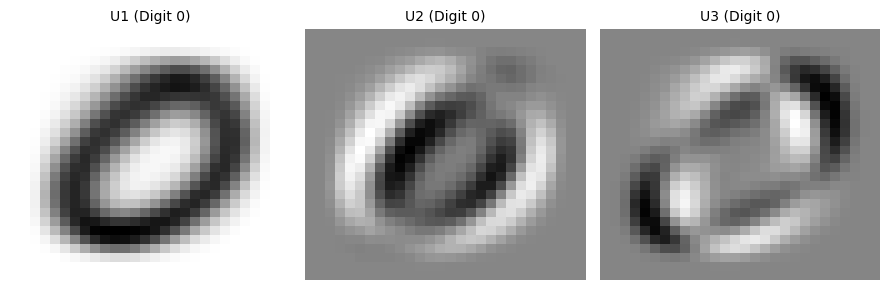

In [17]:
# Separate block for remaining digits: 1, 2, 4, 5, 6, 7, 9, 0
remaining_digits_of_interest = [1, 2, 4, 5, 6, 7, 9, 0]
remaining_U_matrices = {}
remaining_S_matrices = {}
remaining_Vt_matrices = {}

for i in remaining_digits_of_interest:
    index = (TrainLabels == i)
    digit_i_images = TrainDigits[:, index][:, :400]
    U_i, S_i, Vt_i = svd(digit_i_images)
    remaining_U_matrices[i] = U_i
    remaining_S_matrices[i] = S_i
    remaining_Vt_matrices[i] = Vt_i

plt.figure(figsize=(16, 8))
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for idx, i in enumerate(remaining_digits_of_interest):
    ax = axes[idx // 4, idx % 4]
    ax.plot(remaining_S_matrices[i], marker='o')
    ax.set_title(f'Singular Values for Digit {i}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Singular Value')
    ax.grid()

plt.tight_layout()
plt.savefig(f'singular_values.png', format='png')
plt.show()

for i in remaining_digits_of_interest:
    plt.figure(figsize=(9, 3))
    U_digit = remaining_U_matrices[i]
    for idx in range(3):
        plt.subplot(1, 3, idx + 1)
        plt.imshow(U_digit[:, idx].reshape(28, 28).T, cmap='gray', aspect='auto')
        plt.title(f'U{idx + 1} (Digit {i})', fontsize=10)
        plt.axis('off')

    plt.subplots_adjust(wspace=0.3)
    plt.tight_layout()
    plt.savefig(f'singular_images_digit_{i}.png', format='png')
    plt.show()